In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from constants import BASE_DIR, PLOT_DIR

# Loading Data into Pandas frame

In [2]:
path = os.path.join(BASE_DIR,"data", "student_data_per_subject.xlsx")
sheet = "Sheet1"

studentsDataAllSubjects = pd.read_excel(path,sheet_name=sheet, header=[0,2], index_col=[0,1,2])
studentsDataAllSubjects.fillna(0, inplace=True)

studentsDataAllSubjects.index.names = ["year","semester","semester_number"]
studentsDataAllSubjects

WiSe 2005/2006  \
Subject                                                                              0   
year semester                                           semester_number                  
0    "Evangelische Theologie"                           HF                           0   
1    "Evangelische Theologie"                           NF                           0   
2    "Judaistik"                                        HF                           0   
3    "Judaistik"                                        NF                           0   
4    "Katholische Theologie"                            HF                           0   
...                                                                                ...   
623  "Infection Biology and Control"                    NF                           0   
624  "Neural and Behavioural Sciences"                  HF                           0   
625  "Neural and Behavioural Sciences"                  NF                           0   
626  "Psychologie mit Schwerpunkt Klinische Psycholo... HF                           0   
627  "Psychologie mit Schwerpunkt Klinische Psycholo... NF                           0   

                                                                              \
Subject                                                                    1   
year semester                                           semester_number        
0    "Evangelische Theologie"                           HF               121   
1    "Evangelische Theologie"                           NF                14   
2    "Judaistik"                                        HF                 4   
3    "Judaistik"                                        NF                 4   
4    "Katholische Theologie"                            HF                98   
...                                                                      ...   
623  "Infection Biology and Control"                    NF                 0   
624  "Neural and Behavioural Sciences"                  HF                16   
625  "Neural and Behavioural Sciences"                  NF                 0   
626  "Psychologie mit Schwerpunkt Klinische Psycholo... HF                14   
627  "Psychologie mit Schwerpunkt Klinische Psycholo... NF                 0   

                                                                             \
Subject                                                                   2   
year semester                                           semester_number       
0    "Evangelische Theologie"                           HF               35   
1    "Evangelische Theologie"                           NF                2   
2    "Judaistik"                                        HF                0   
3    "Judaistik"                                        NF                0   
4    "Katholische Theologie"                            HF               13   
...                                                                      ..   
623  "Infection Biology and Control"                    NF                0   
624  "Neural and Behavioural Sciences"                  HF                0   
625  "Neural and Behavioural Sciences"                  NF                0   
626  "Psychologie mit Schwerpunkt Klinische Psycholo... HF                0   
627  "Psychologie mit Schwerpunkt Klinische Psycholo... NF                0   

                                                                             \
Subject                                                                   3   
year semester                                           semester_number       
0    "Evangelische Theologie"                           HF               81   
1    "Evangelische Theologie"                           NF                5   
2    "Judaistik"                                        HF                0   
3    "Judaistik"                                        NF                0   
4    "Katholische Theologie"  

In [3]:
allStudentsPerSemesterAndYear = studentsDataAllSubjects.sum(numeric_only=True)
allStudentsPerSemesterAndYear

                Subject
WiSe 2005/2006  0              7.0
                1          11381.0
                2           2553.0
                3           5545.0
                4           2352.0
                            ...   
WiSe 2023/2024  9           1564.0
                10           361.0
                11           921.0
                12           206.0
                >12         1778.0
Length: 518, dtype: float64

In [4]:
allStudentsPerSubject = studentsDataAllSubjects.sum(numeric_only=True, axis=1)
allStudentsPerSubject

year  semester                                                                semester_number
0     "Evangelische Theologie"                                                HF                 24306.0
1     "Evangelische Theologie"                                                NF                  2277.0
2     "Judaistik"                                                             HF                   489.0
3     "Judaistik"                                                             NF                   589.0
4     "Katholische Theologie"                                                 HF                 14795.0
                                                                                                  ...   
623   "Infection Biology and Control"                                         NF                     0.0
624   "Neural and Behavioural Sciences"                                       HF                    16.0
625   "Neural and Behavioural Sciences"                           

# First data exploration
To get a better understanding of the dataset we are going to do some simple analysis, which contains of the following plots

- line chart
- boxplot
- heatmap

With these basic plots we want to search for correlations in the data

/var/folders/jx/m3cxmskj415bp4_r5_ywn_l00000gn/T/ipykernel_92395/4222334298.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.bar(year,data,bottom=data[idx], label=f"Semester {idx}", align="center", width=0.3, color=colors[idx])


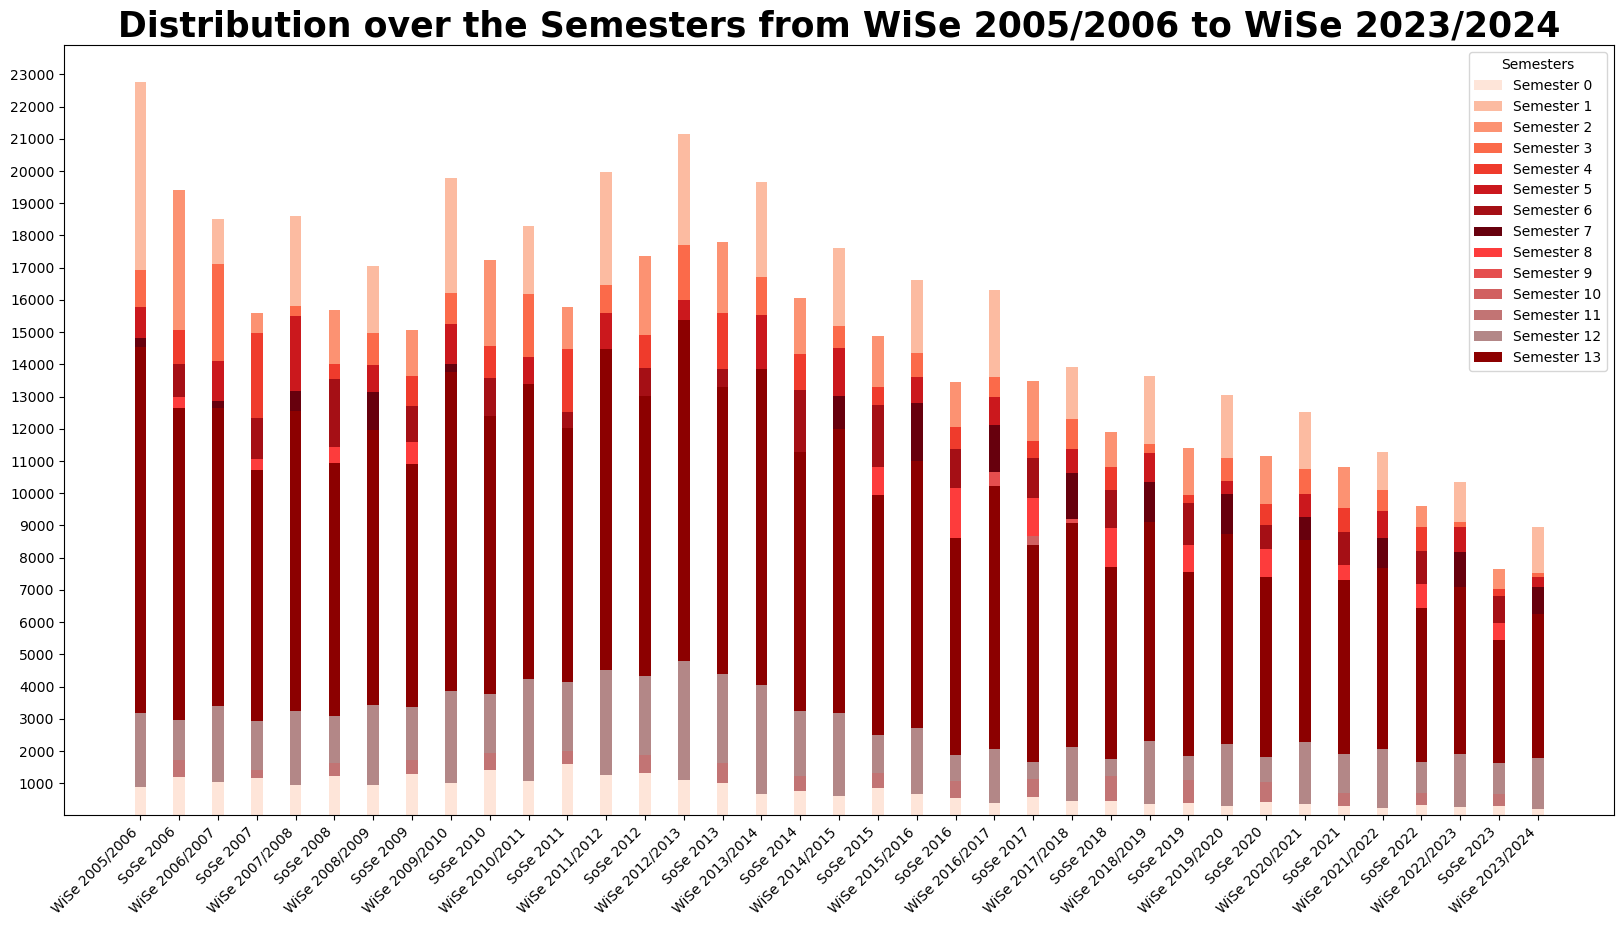

In [16]:
fig, ax = plt.subplots(figsize=(20,10))
years = studentsDataAllSubjects.columns.get_level_values(0).unique()
semester = studentsDataAllSubjects.columns.get_level_values(1).unique()

studentsDataAllSubjects.index.names
#groupedByYearStudentsSum = 
allStudentsPerSemesterAndYear.groupby(level=0)
#colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#1a9850', '#d73027', '#4575b4']
colors = [
    "#fee5d9",
    "#fcbba1",
    "#fc9272",
    "#fb6a4a",
    "#ef3b2c",
    "#cb181d",
    "#a50f15",
    "#67000d",
    "#fd3c3c",
    "#e54e4e",
    "#d16060",
    "#c27474",
    "#b38787",
    "#8c0000"
]

   





def createBarPlot(years,ax):
    for year in years:
        data = allStudentsPerSemesterAndYear[year]
        for idx in range(0,len(data)):
            ax.bar(year,data,bottom=data[idx], label=f"Semester {idx}", align="center", width=0.3, color=colors[idx])
        



def legendWithoutDuplicateLabels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique), title="Semesters")



plt.title("Distribution over the Semesters from WiSe 2005/2006 to WiSe 2023/2024", fontsize=25,fontweight='bold')
plt.yticks(np.arange(0,24000,1000))
plt.xticks(rotation=45, ha='right', fontsize=10)

createBarPlot(years, ax)

legendWithoutDuplicateLabels(ax)

plt.show()
    




        


## Analysis of the stacked bar chart
As you can see, there are two different slopes in the data which can be explained by the difference of students starting in the summer semester than in the winter semester. This could have several reasons like the a levels take place in summer, so the students want to start at the next possible state.

A more interesting part is that the overall amount of students decreases, although previous analysis showed, that the overall amount of students significantly increased over the years. The reason for this is that many subjects are no longer taught in Tuebingen, and we subsituted these NaN values with 0.

/var/folders/jx/m3cxmskj415bp4_r5_ywn_l00000gn/T/ipykernel_92395/4222334298.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.bar(year,data,bottom=data[idx], label=f"Semester {idx}", align="center", width=0.3, color=colors[idx])


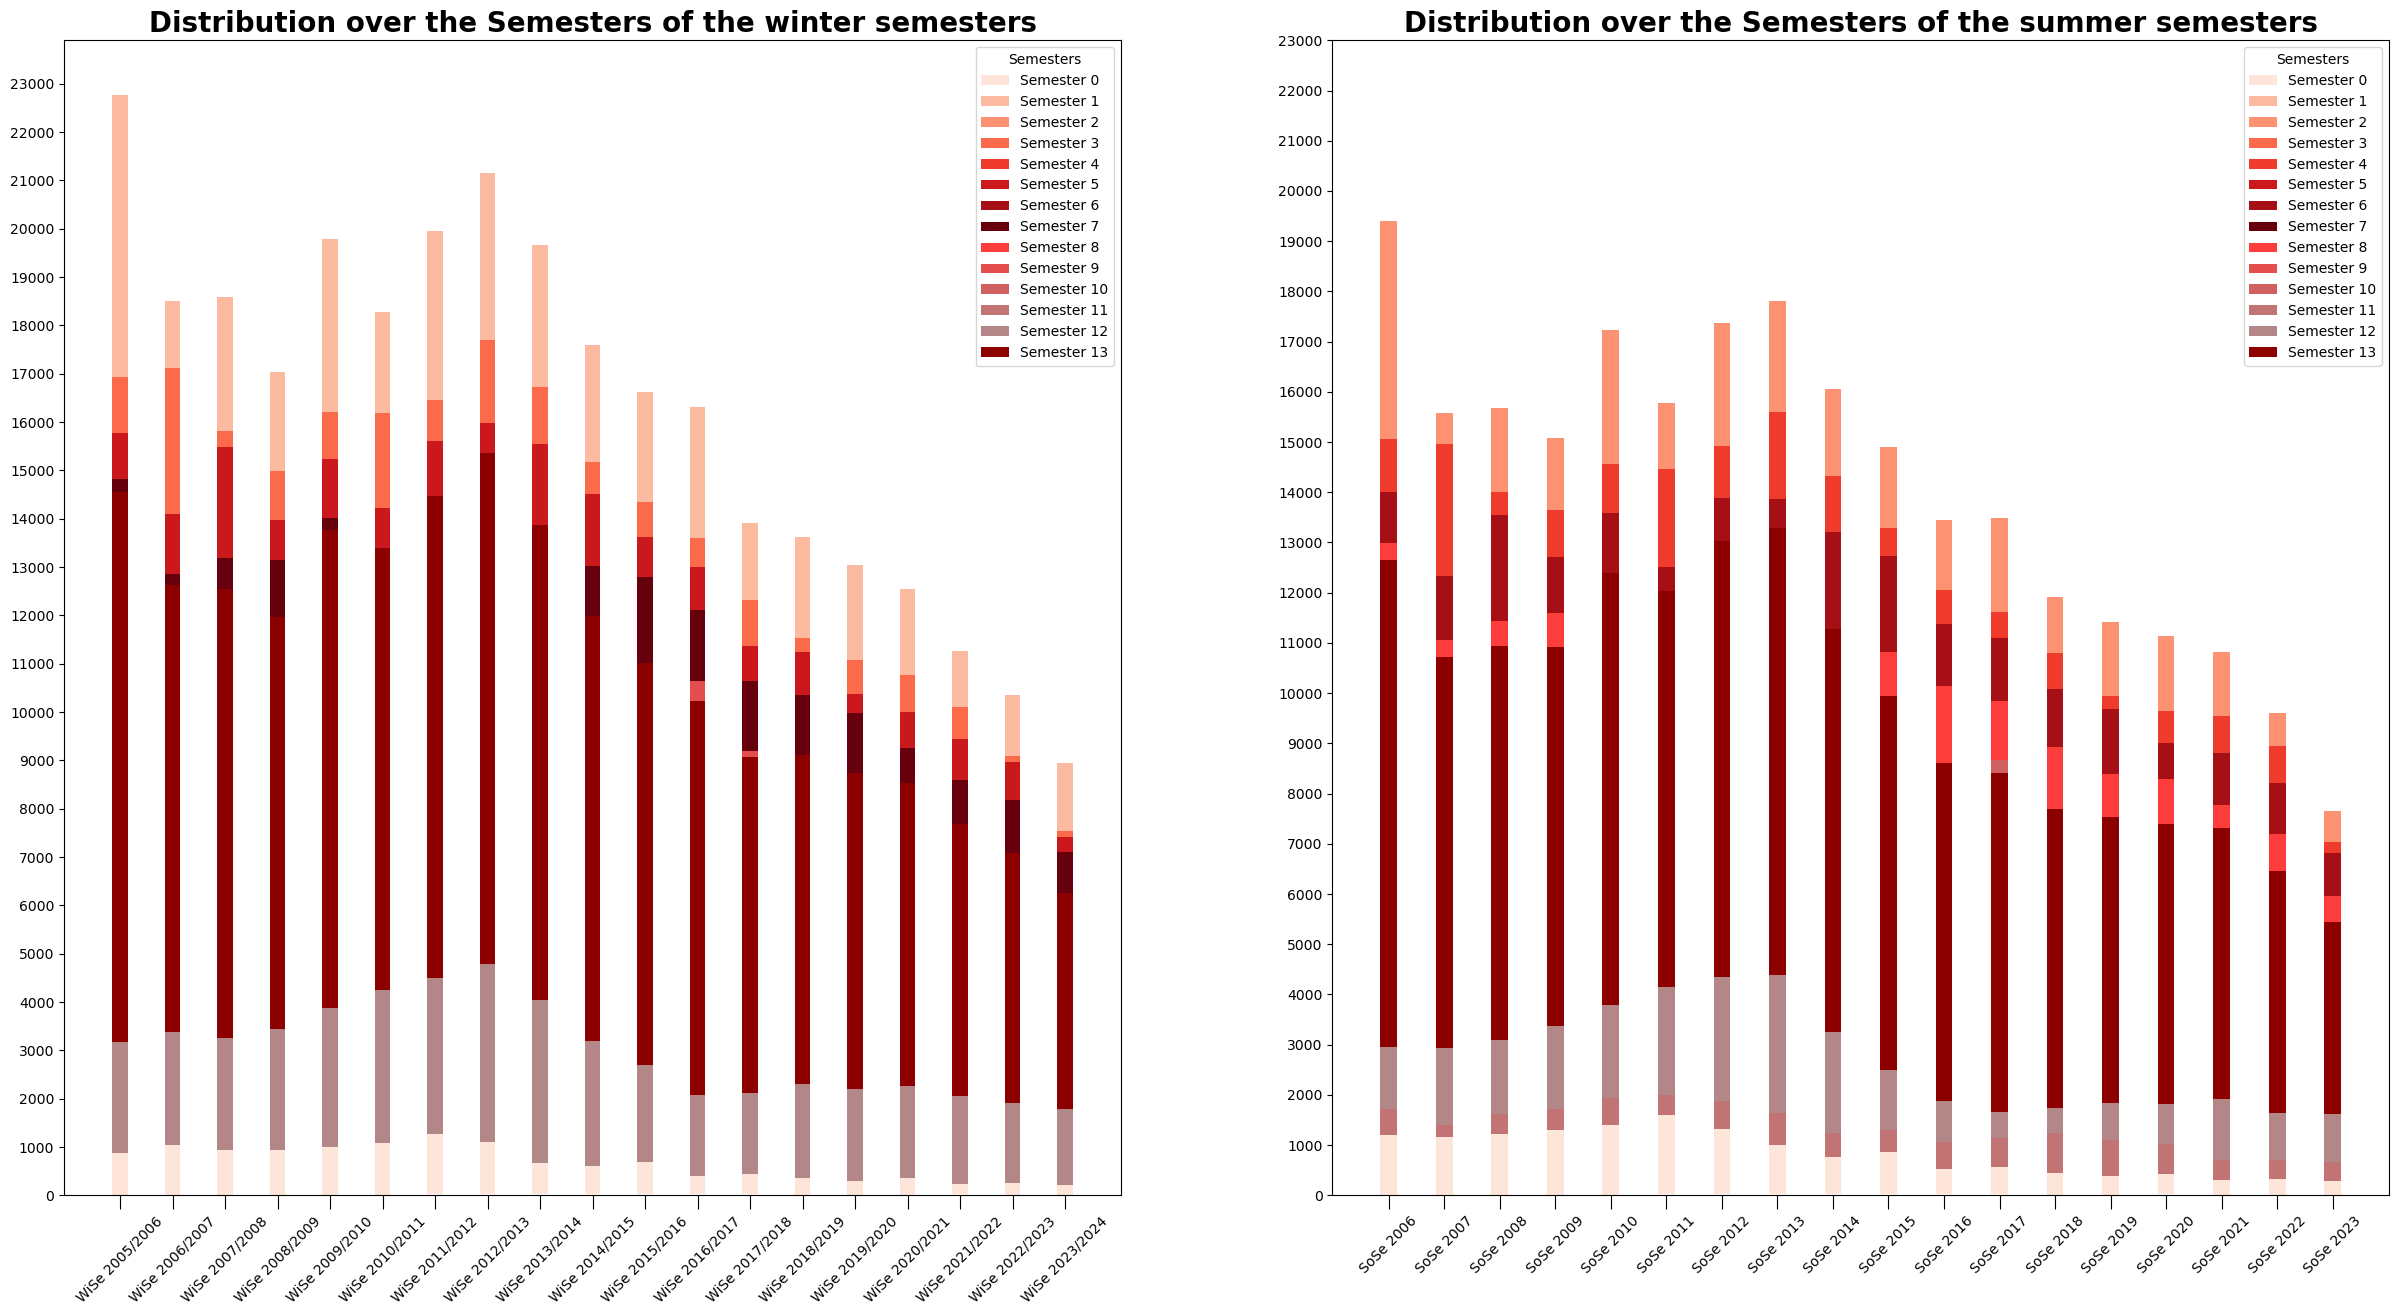

In [17]:
winterSemesterPattern = re.compile(r"WiSe.*")
summerSemesterPattern = re.compile(r"SoSe.*")

summerSemester = [summerData for summerData in years if re.match(summerSemesterPattern, summerData)]
winterSemester = [winterData for winterData in years if re.match(winterSemesterPattern, winterData)]
       

fig, ax = plt.subplots(1,2,figsize=(30,15))

createBarPlot(winterSemester,ax[0])
createBarPlot(summerSemester,ax[1])
legendWithoutDuplicateLabels(ax[0])
legendWithoutDuplicateLabels(ax[1])

ax[0].set_title("Distribution over the Semesters of the winter semesters", size=20, fontweight='bold')
ax[0].tick_params(axis='x',rotation=45, right='right', size=10)
ax[0].set_yticks(np.arange(0,24000,1000));
ax[1].set_title("Distribution over the Semesters of the summer semesters", size=20,fontweight='bold')
ax[1].tick_params(axis='x',rotation=45, right='right', size=10)
ax[1].set_yticks(np.arange(0,24000,1000));




## Feature Analysis of specific STEM subjects of the university
